In [5]:
#Machine learning with python ch-4,5,6
#ML has 2 types supervised and unsupervised
# supervised has : regression,knn,decision tree,random forest,Neural network
#unsupervised
#Feature engineering
#Adding a new feature
import pandas as pd
room_length = [18,20,10,12,18,11]
room_breadth = [20,20,10,11,19,10]
room_type = ['Big','Big','Normal','Normal','Big','Normal']
data = pd.DataFrame({'length':room_length,'breadth':room_breadth,'type':room_type})
print(data)
data['Area'] = data['length']*data['breadth']
print(data)
#feature transformation
df = pd.get_dummies(data) #categorial(object) to numeric
print(df)


   length  breadth    type
0      18       20     Big
1      20       20     Big
2      10       10  Normal
3      12       11  Normal
4      18       19     Big
5      11       10  Normal
   length  breadth    type  Area
0      18       20     Big   360
1      20       20     Big   400
2      10       10  Normal   100
3      12       11  Normal   132
4      18       19     Big   342
5      11       10  Normal   110
   length  breadth  Area  type_Big  type_Normal
0      18       20   360         1            0
1      20       20   400         1            0
2      10       10   100         0            1
3      12       11   132         0            1
4      18       19   342         1            0
5      11       10   110         0            1


In [6]:
import numpy as np
import pandas as pd
appartment_area = [4720,2430,4368,3969,6142,7912]
appartment_price = [2360000,1215000,2184000,1984500,3071000,3456000]
df = pd.DataFrame({'Area':appartment_area,'Price':appartment_price})
print(df)
df['Price'] = np.where(df['Price']>3000000,'High',np.where(df['Price']<2000000,'Low','Medium'))
print(df)

   Area    Price
0  4720  2360000
1  2430  1215000
2  4368  2184000
3  3969  1984500
4  6142  3071000
5  7912  3456000
   Area   Price
0  4720  Medium
1  2430     Low
2  4368  Medium
3  3969     Low
4  6142    High
5  7912    High


     cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]


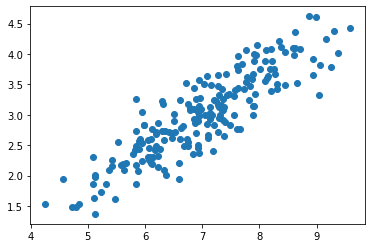

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(160, 1)
(40, 1)
(160,)
(40,)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("Book1.csv")
print(df)
plt.scatter(df['cgpa'],df['package'])
plt.show()
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]
print(type(X))
print(type(Y))
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 
import pandas as pd
df = pd.read_csv("Book1.csv")
x = df.iloc[:,0:1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 40)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
m = lr.coef_
c = lr.intercept_
print(m,c)
print("mse =",mean_squared_error(y_test,y_pred))
print("r2 score =",r2_score(y_test,y_pred))
my_pkg = lr.predict([[8.19]])
print(my_pkg)

[0.58622321] -1.0803901371318942
mse = 0.10351480752583134
r2 score = 0.6462843124730797
[3.72077798]


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 
import pandas as pd
df = pd.read_csv("Book1.csv")
x = df.iloc[:,0:1]
y = df.iloc[:,-1]
maxr = rs = 0
for i in range(101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    m = lr.coef_
    c = lr.intercept_
    maxr = max(maxr,r2_score(y_test,y_pred))
print(maxr)

0.8604407387366203


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 
import pandas as pd
df = pd.read_csv("olympic100m.csv")
x = df.iloc[:,0:1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 40)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
m = lr.coef_
c = lr.intercept_
print(m,c)
print("mse =",mean_squared_error(y_test,y_pred))
print("r2 score =",r2_score(y_test,y_pred))

[-0.01291257] 35.61976609130507
mse = 0.034169564591521116
r2 score = 0.7278530253772657


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 
import pandas as pd
df = pd.read_csv("car data.csv")
print(df)
df['Age'] = 2025-df['Year']
x = df[['Age','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','Present_Price']]
y = df['Selling_Price']
x = pd.get_dummies(x,drop_first = True)
print(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=40)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
m = lr.coef_
c = lr.intercept_
print(m,c)
print("mse =",mean_squared_error(y_test,y_pred))
print("r2 score =",r2_score(y_test,y_pred))

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [42]:
# create a multiple linear regression model and find r2 score and mse for advertising.csv file.
# In that model can predict sales of any company depending on advertising like tv,radio and newspaper.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score 
import pandas as pd
df = pd.read_csv("advertising.csv")
print(df)
x = df[['TV','Radio','Newspaper']]
y = df['Sales']
print(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=40)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
m = lr.coef_
c = lr.intercept_
print(m,c)
print("mse =",mean_squared_error(y_test,y_pred))
print("r2 score =",r2_score(y_test,y_pred))

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]
        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
[ 0.053514    0.11565901 -0.00517342] 4.842276855109867
mse = 4.332995687070389
r2 score = 0.8477283412895041


   Temp  Pressure
0     0    0.0002
1    20    0.0012
2    40    0.0060
3    60    0.0300
4    80    0.0900
5   100    0.2700


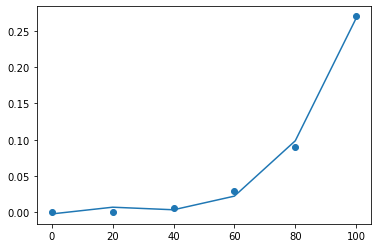

In [56]:
# Polynomial regression
# y = b0+b1x+b2x^2....bnx^n+E
# y = dependent var
# x = independent var
# E = errors
# b = coefficient of polynomial
# n = degree of polynomial
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
df = pd.DataFrame({'Temp':[0,20,40,60,80,100],'Pressure':[0.0002,0.0012,0.0060,0.0300,0.0900,0.2700]})
print(df)
x = df.iloc[:,0:1]
y = df.iloc[:,-1]
poly = PolynomialFeatures(degree=3)
model_poly = poly.fit_transform(x)
lr = LinearRegression()
lr.fit(model_poly,y)
plt.scatter(x,y)
plt.plot(x,lr.predict(model_poly))
plt.show()

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
df = pd.DataFrame({'Temp':[0,20,40,60,80,100],'Pressure':[0.0002,0.0012,0.0060,0.0300,0.0900,0.2700]})
print(df)
x = df.iloc[:,0:1]
y = df.iloc[:,-1]
lr = LinearRegression()
lr.fit(x,y)
x_t = [[70]]
print(lr.predict(x_t))
poly = PolynomialFeatures(degree = 3)
model = poly.fit_transform(x)
lr.fit(model,y)
print(lr.predict(poly.fit_transform(x_t)))

   Temp  Pressure
0     0    0.0002
1    20    0.0012
2    40    0.0060
3    60    0.0300
4    80    0.0900
5   100    0.2700
[0.11307333]
[0.05120625]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("car data.csv")
# print(df)
df['Age'] = 2025-df['Year']
x = df[['Age','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','Present_Price']]
y = df['Selling_Price']
x = pd.get_dummies(x,drop_first = True)
# print(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=40)
lr = LinearRegression()
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
lr.fit(x_train_poly,y_train)
y_train_pred = lr.predict(x_train_poly)
y_test_pred = lr.predict(x_test_poly)
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)
print("MSE train =",mse_train,", R2 score train =",r2_train)

MSE train = 9.337610943037559 , R2 score train = 0.6646551612677899


In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np

df = pd.read_csv('CarPrice_Assignment.csv')
# df.info()
scale_col = [["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio",'stroke','compressionratio',"horsepower","peakrpm","citympg","highwaympg","price"]]
for c in scale_col:
    df[c]=np.log(df[c])
# display(df)
company_names = []
for car_name in df["CarName"] :
    company_name = car_name.split(" ")[0]
    company_names.append(company_name)
df['Company'] = company_names
df["Company"].unique()
df.Company.replace("maxda","mazda",inplace=True)
df.Company.replace("Nissan","nissan",inplace=True)
df.Company.replace("toyouta","toyota",inplace=True)
df.Company.replace("vokswagen","volkswagen",inplace=True)
df.Company.replace("vw","volkswagen",inplace=True)
df.Company.replace("porcshce","porsche",inplace=True)
df["Company"].unique()
df.drop(columns=['car_ID','CarName',"symboling"],inplace=True)
categorial_col = ["Company","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","fuelsystem","cylindernumber"]
df = pd.get_dummies(df,prefix= categorial_col,columns=categorial_col,drop_first=True)
x = df.drop(columns=['price'])
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

lr=LinearRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

r2 = r2_score(y_test,y_pred)

print("R2_score",r2_score(y_test,y_pred))
print("Mse",mean_squared_error(y_test,y_pred))
print(x.shape)

R2_score 0.8934331053661403
Mse 0.02991709022278933
(205, 63)


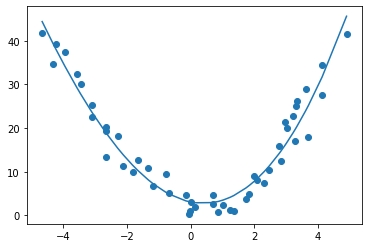

R2 score = 0.9367011897445384
Mean squared error = 9.327243445671261


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np
df = pd.read_csv("Ice_cream selling data.csv")
# print(df)
x = df.iloc[:,0:1]
y = df.iloc[:,-1]
poly = PolynomialFeatures(degree = 3)
model = poly.fit_transform(x)
lr = LinearRegression()
lr.fit(model,y)
plt.scatter(x,y)
plt.plot(x,lr.predict(model))
plt.show()
y_pred = lr.predict(model)
print("R2 score =",r2_score(y,y_pred))
print("Mean squared error =",mean_squared_error(y,y_pred))

In [4]:
#Classification based supervised learning
#KNN (K nearest neighbour)
#Confusion matrix : [[TN FP][FN TP]]
# STATUS   ACTUAL   PRED
# TN         0        0
# FP         0        1
# FN         1        0
# TP         1        1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv("diabetes.csv")
x = df.iloc[:,0:8]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
nn = KNeighborsClassifier(n_neighbors = 22)
model = nn.fit(x_train,y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = (cm[1][1]+cm[0][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
error_rate = 1-accuracy
sensivity = (cm[1][1])/(cm[1][1]+cm[1][0])
specificity = (cm[0][0])/(cm[0][0]+cm[0][1])
precision_score = (cm[1][1])/(cm[0][1]+cm[1][1])
print("Confusion matrix =",cm)
print("Accuracy =",accuracy)
print("Error rate =",error_rate)
print("Sensitivity =",sensivity)
print("Specificity =",specificity)
print("Precision score =",precision_score)

Confusion matrix = [[88 11]
 [29 26]]
Accuracy = 0.7402597402597403
Error rate = 0.2597402597402597
Sensitivity = 0.4727272727272727
Specificity = 0.8888888888888888
Precision score = 0.7027027027027027


In [7]:
df = pd.read_csv("PlayTennis.csv")
x = df[["outlook","temp","humidity","windy","play"]]
x = pd.get_dummies(x,drop_first=True)
y = df.iloc[:,-1]
nn = KNeighborsClassifier(n_neighbors=5)
model = nn.fit(x,y)
y_pred = model.predict(x)
cm = confusion_matrix(y,y_pred)
print(cm)

[[4 1]
 [0 9]]
